# Final Project 2
Authors and Creators:

  1. Aliza Muslimah
  2. Padmadi Cahyo Wibowo
  3. Tegar Ahmad Arsy

## Objektif
Final Project 2 ini dibuat guna mengevaluasi konsep Regression sebagai berikut:
- Mampu memahami konsep Classification dengan Logistic Regression dan SVM
- Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM
- Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi

## Perkenalan
Bab pengenalan harus diisi dengan latar belakang memilih kasus, data yang
digunakan (jumlah data, kelas, sumber), dan objective yang ingin dicapai.

1. Latar belakang memilih kasus
Ingin membangun sebuah model klasifikasi yang bisa memprediksi terjadinya hujan di Australia berdasarkan nilai fitur yang diinputkan.

2. Data penelitian
Data ini bernama Rain in Australia yang diperoleh dari https://www.kaggle.com/jsphyg/weather-dataset-rattle-package. Data ini digunakan untuk memprediksi apakah terjadi hujan pada keesokan hari dari tanggal pengamatan. Data ini adalah data hujan harian selama 10 tahun di berbagai lokasi di Australia. Jumlah dataset ini adalah 145.460 baris data dengan 23 atribut.
Atribut yang menjadi label kelas yaitu RainTomorrow yang berisi "No" (tidak terjadi hujan besok harinya) dan "Yes" (terjadi hujan besok harinya 1mm atau lebih).

Nama, penjelasannya, serta tipe data dari atribut yang terdapat pada datasets, adalah sebagai berikut:

1) Atribut bertipe kategorikal (nominal dan/atau ordinal)

*   Location     - lokasi, nama kota di Australia
*   WindGustDir  - arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
*   WindDir9am   - arah angin jam 9 pagi
*   WindDir3pm   - arah angin jam 3 sore
*   RainToday    - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
*   RainTomorrow - variable yang mau di prediksi

2) Atribut bertipe numerikal (int, float)

*   MinTemp - temperatur terendah hari itu dalam celcius
*   MaxTemp - temperatur tertinggi hari itu dalam celcius
*   Rainfall - jumlah curah hujan hari itu dalam mm
*   Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
*   Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
*   WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
*   WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
*   WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
*   Humidity9am - humiditas jam 9 pagi dalam persen
*   Humidity3pm - humiditas jam 3 sore dalam persen
*   Pressure9am - tekanan udara jam 9 pagi dalam hpa
*   Pressure3pm - tekanan udara jam 3 sore dalam hpa
*   Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
*   Cloud3pm - persentase langit yang tertutup awan jam 3 sore
*   Temp9am - temperatur jam 9 pagi dalam celcius
*   Temp3pm - temperatur jam 3 sore dalam celcius


3) Atribut bertipe date (time series)

*   Date - tanggal hari itu

3. Objective yang ingin dicapai

model prediksi Besok Hujan yang dibentuk diharapkan dapat memberikan hasil akurasi yang maksimal. selain itu, model prediksi Besok Hujan yang dibentuk mengaitkan dengan beberapa faktor yang mempengaruhi yaitu hari ini hujan, arah angin 3 sore, dan bulan.

## Install dan Import Pustaka yang dibutuhkan

In [1]:
'''Pustaka untuk pengolahan data'''
import pandas as pd
import numpy as np
from scipy import stats


'''Pustaka untuk proses machine learning dan data science'''
# Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder #ordinal encoding untuk atribut kategorikal
from sklearn.preprocessing import MinMaxScaler,StandardScaler #scaler for normalization 
from sklearn.preprocessing import OneHotEncoder #one hot encoding nominal atribut
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer

# Chi-Square and Mutual Information feature selection for numeric input and categorical output
from sklearn.feature_selection import mutual_info_classif

# splitting dataset and kfold
from sklearn.model_selection import train_test_split,KFold, cross_val_score, GridSearchCV

# dimensionality reduction
from sklearn.decomposition import PCA

# modelling
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# model performance
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, r2_score, mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,ShuffleSplit


'''Pustaka untuk Visualisasi'''
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


'''Pustaka Pendukung'''
# save models
import pickle



## Data Loading
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana.

In [2]:
# Loading data dengan Pandas 
df_asli = pd.read_csv('weatherAUS.csv', skipinitialspace=True)

In [3]:
# Menampilkan sekilas isi data
df_asli

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
# Mengetahui dimensi data
df_asli.shape

(145460, 23)

In [5]:
# Mengetahui daftar kolom
daftar_kolom = df_asli.columns.values
print(daftar_kolom)

['Date' 'Location' 'MinTemp' 'MaxTemp' 'Rainfall' 'Evaporation' 'Sunshine'
 'WindGustDir' 'WindGustSpeed' 'WindDir9am' 'WindDir3pm' 'WindSpeed9am'
 'WindSpeed3pm' 'Humidity9am' 'Humidity3pm' 'Pressure9am' 'Pressure3pm'
 'Cloud9am' 'Cloud3pm' 'Temp9am' 'Temp3pm' 'RainToday' 'RainTomorrow']


In [6]:
# Meihat tipe data setiap kolom
df_asli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## Data Cleaning
Bagian ini berisi proses penyiapan data berupa data cleaning sebelum
dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa
memberi nama baru untuk setiap kolom, mengisi missing values,
menghapus kolom yang tidak dipakai, dan lain sebagainya. 

In [7]:
#cek null values
df_asli.isnull().sum().sort_values()

Date                 0
Location             0
MaxTemp           1261
MinTemp           1485
Temp9am           1767
WindSpeed9am      1767
Humidity9am       2654
WindSpeed3pm      3062
Rainfall          3261
RainToday         3261
RainTomorrow      3267
Temp3pm           3609
WindDir3pm        4228
Humidity3pm       4507
WindGustSpeed    10263
WindGustDir      10326
WindDir9am       10566
Pressure3pm      15028
Pressure9am      15065
Cloud9am         55888
Cloud3pm         59358
Evaporation      62790
Sunshine         69835
dtype: int64

**Memisahkan atribut menjadi atribut numerikal dan atribut kategorikal**

In [8]:
df_preclean = df_asli.copy() 

# Atribut yang bertipe numerik (int dan float)
num_cols = df_preclean.select_dtypes(include=['float64','int64']).columns.values

# Atribut yang bertipe kategorikal (object)
cat_cols = df_preclean.select_dtypes(include=['object']).columns.values


In [9]:
# Melihat daftar atribut numerik dan kategorikal
print("Daftar Atribut Numerik")
print(num_cols)
print("*"*50)
print("Daftar Atribut Kategorikal")
print(cat_cols)

Daftar Atribut Numerik
['MinTemp' 'MaxTemp' 'Rainfall' 'Evaporation' 'Sunshine' 'WindGustSpeed'
 'WindSpeed9am' 'WindSpeed3pm' 'Humidity9am' 'Humidity3pm' 'Pressure9am'
 'Pressure3pm' 'Cloud9am' 'Cloud3pm' 'Temp9am' 'Temp3pm']
**************************************************
Daftar Atribut Kategorikal
['Date' 'Location' 'WindGustDir' 'WindDir9am' 'WindDir3pm' 'RainToday'
 'RainTomorrow']


In [10]:
# Menghitung statistik deskriptif dari data dengan atribut numerik
df_preclean[num_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [11]:
# Melihat nilai unique dari atribut kategorikal

for column in df_preclean[cat_cols]:
    print("Nilai unik atribut {} ({} nilai)".format(column.upper(),df_preclean[column].nunique()))
    print(f'{column} : {df_preclean[column].unique()}')
    print()

Nilai unik atribut DATE (3436 nilai)
Date : ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']

Nilai unik atribut LOCATION (49 nilai)
Location : ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']

Nilai unik atribut WINDGUSTDIR (16 nilai)
WindGustDir : ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']

Nilai unik atribut WINDDIR9AM (16 nilai)
WindDir9am : ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S'

**Melihat jumlah missing values pada atribut numerikal dan kategorikal**

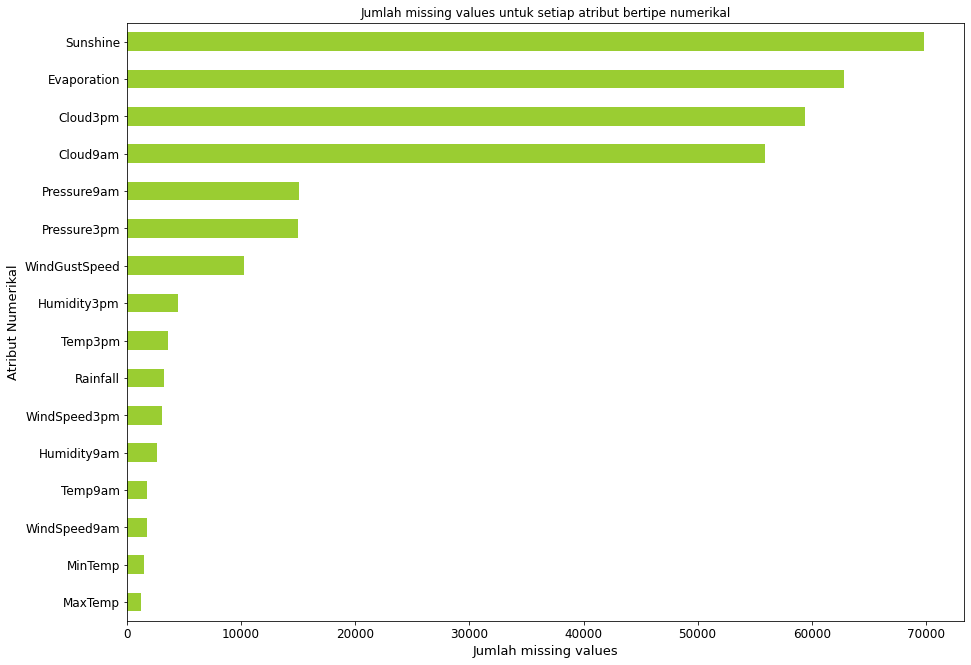

In [12]:
num_missing_values = df_preclean[num_cols].isnull().sum().sort_values()

# bar plot untuk menunjukkan besaran missing values pada atribut categorical
plt.figure(figsize=(15,11))
num_missing_values.plot(kind='barh', fontsize=12, color='yellowgreen')
plt.title('Jumlah missing values untuk setiap atribut bertipe numerikal', fontsize=12)
plt.xlabel('Jumlah missing values', fontsize=13)
plt.ylabel('Atribut Numerikal', fontsize=13)
plt.show()

**Analisis**
1. Dapat dilihat pada bar chart diatas masih terdapat banyak missing values pada setiap atribut numerikal
2. Missing values untuk atribut numerikal akan ditangani dengan cara mengisi nilai nan dengan nilai median dari masing-masing atribut. Nilai median digunakan karena relatif tidak sensitif dibandingkan dengan penggunaan nilai mean.

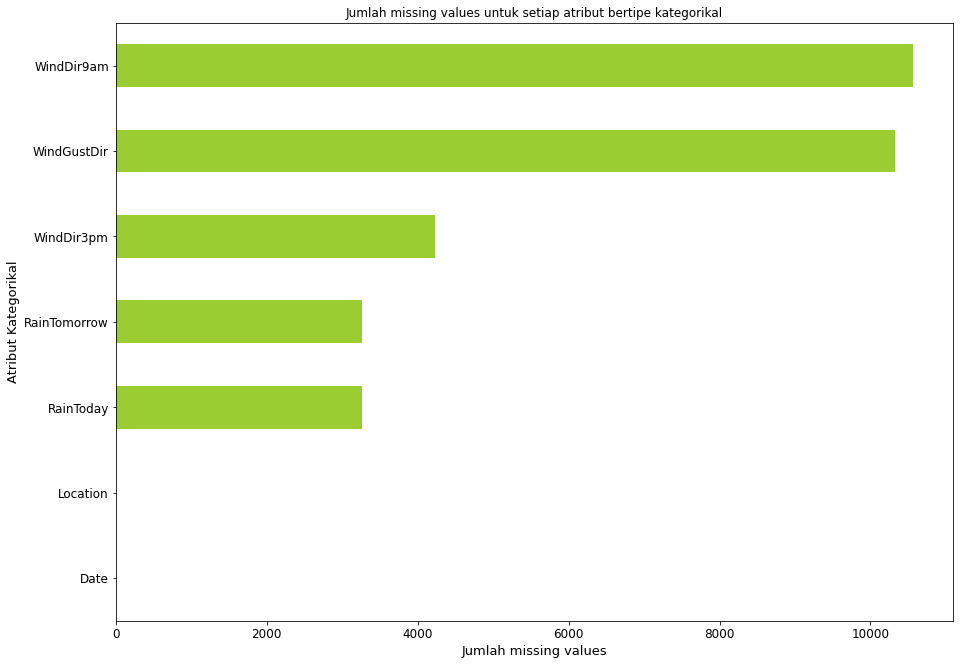

In [13]:
cat_missing_values = df_preclean[cat_cols].isnull().sum().sort_values()

# bar plot untuk menunjukkan besaran missing values pada atribut categorical
plt.figure(figsize=(15,11))
cat_missing_values.plot(kind='barh', fontsize=12, color='yellowgreen')
plt.title('Jumlah missing values untuk setiap atribut bertipe kategorikal', fontsize=12)
plt.xlabel('Jumlah missing values', fontsize=13)
plt.ylabel('Atribut Kategorikal', fontsize=13)
plt.show()

**Analisis**
1. Missing values untuk atribut kategorikal akan ditangani dengan cara mengisi nilai nan dengan nilai modus dari masing-masing atribut.
2. Label kelas RainTomorrow ternyata mengandung cukup banyak missing values. Untuk label kelas, baris data yang mengandung missing values akan dihapus. Hal ini karena kita tidak memiliki pengetahuan tentang ilmu astronomi dan ilmu hujan, sehingga kita tidak bisa menentukan label kelas yang hilang secara manual dan mengisinya.

In [14]:
# rename kolom dari datasets
def rename_columns_df(df):
    df = df.rename(
        columns={
            'Date':'Tanggal',
            'Location':'Lokasi',
            'MinTemp':'Suhu Minimum',
            'MaxTemp':'Suhu Maximum',
            'Rainfall':'Curah Hujan',
            'Evaporation':'Penguapan',
            'Sunshine':'Jam Cerah',
            'WindGustDir':'Arah Angin 24 jam',
            'WindGustSpeed':'Kecepatan Angin 24 jam',
            'WindDir9am':'Arah Angin 9 Pagi',
            'WindDir3pm':'Arah Angin 3 Sore',
            'WindSpeed9am':'Kecepatan Angin 9 Pagi',
            'WindSpeed3pm':'Kecepatan Angin 3 Sore',
            'Humidity9am':'Kelembaban 9 Pagi',
            'Humidity3pm':'Kelembaban 3 Sore',
            'Pressure9am':'Tekanan Udara 9 Pagi',
            'Pressure3pm':'Tekanan Udara 3 Sore',
            'Cloud9am':'Awan 9 Pagi',
            'Cloud3pm':'Awan 3 Sore',
            'Temp9am':'Suhu Celcius 9 Pagi',
            'Temp3pm':'Suhu Celcius 3 Sore',
            'RainToday':'Hari ini Hujan',
            'RainTomorrow':'Besok Hujan',
        },
    )
    return df

# memilih atribut numerikal dan kategorikal
def attributes_type(df,include_numerical=['float64','int64'], include_categorical=['object']):
    num_cols = df.select_dtypes(include=include_numerical).columns.values
    cat_cols = df.select_dtypes(include=include_categorical).columns.values
    return num_cols,cat_cols

**Merename nama kolom**

In [15]:
df_preclean = rename_columns_df(df_preclean)
 
# kelompokkan atribut berdasarkan tipe datanya
num_cols,cat_cols = attributes_type(df_preclean)

In [16]:
# menampilkan 5 data teratas setelah nama kolom direname
df_preclean.head()

,Tanggal,Lokasi,Suhu Minimum,Suhu Maximum,Curah Hujan,Penguapan,Jam Cerah,Arah Angin 24 jam,Kecepatan Angin 24 jam,Arah Angin 9 Pagi,...,Kelembaban 9 Pagi,Kelembaban 3 Sore,Tekanan Udara 9 Pagi,Tekanan Udara 3 Sore,Awan 9 Pagi,Awan 3 Sore,Suhu Celcius 9 Pagi,Suhu Celcius 3 Sore,Hari ini Hujan,Besok Hujan
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**Menghapus data yang label kelas ('Hari besok Hujan') mengandung missing values**

In [17]:
df_preclean.drop(df_preclean[
    df_preclean['Besok Hujan'].isnull()
].index.values,inplace=True)

**Mengisi missing values pada atribut kategorikal kecuali label kelas**

In [18]:
for cat_col in cat_cols:
    df_preclean[cat_col].fillna(df_preclean[cat_col].mode()[0],inplace=True) 

**Mengisi missing values pada atribut numerikal**

In [19]:
for num_col in num_cols: 
    df_preclean[num_col].fillna(df_preclean[num_col].median(),inplace=True)

**Mengecek rangkuman total missing values untuk setiap kolom**

In [20]:
df_preclean.isnull().sum()

Tanggal                   0
Lokasi                    0
Suhu Minimum              0
Suhu Maximum              0
Curah Hujan               0
Penguapan                 0
Jam Cerah                 0
Arah Angin 24 jam         0
Kecepatan Angin 24 jam    0
Arah Angin 9 Pagi         0
Arah Angin 3 Sore         0
Kecepatan Angin 9 Pagi    0
Kecepatan Angin 3 Sore    0
Kelembaban 9 Pagi         0
Kelembaban 3 Sore         0
Tekanan Udara 9 Pagi      0
Tekanan Udara 3 Sore      0
Awan 9 Pagi               0
Awan 3 Sore               0
Suhu Celcius 9 Pagi       0
Suhu Celcius 3 Sore       0
Hari ini Hujan            0
Besok Hujan               0
dtype: int64

**Menghapus kolom yang tidak dipakai**
Kolom Tanggal akan diubah menjadi tipe datetime, lalu akan di-breakdown menjadi Tahun, Bulan, Hari. Selanjutnya kolom Tanggal akan dihapus

In [21]:
# mengubah tipe data menjadi datetime
df_preclean['Tanggal'] = pd.to_datetime(df_preclean['Tanggal'])

# ambil Tahun,Bulan,Hari dan jadikan atribut
df_preclean['Tahun'] = df_preclean['Tanggal'].dt.year
df_preclean['Bulan'] = df_preclean['Tanggal'].dt.month_name()
df_preclean['Hari'] = df_preclean['Tanggal'].dt.day_name()

# drop kolom "Tanggal"
df_preclean.drop('Tanggal', axis=1,inplace=True)

In [22]:
df_preclean.columns

Index(['Lokasi', 'Suhu Minimum', 'Suhu Maximum', 'Curah Hujan', 'Penguapan',
       'Jam Cerah', 'Arah Angin 24 jam', 'Kecepatan Angin 24 jam',
       'Arah Angin 9 Pagi', 'Arah Angin 3 Sore', 'Kecepatan Angin 9 Pagi',
       'Kecepatan Angin 3 Sore', 'Kelembaban 9 Pagi', 'Kelembaban 3 Sore',
       'Tekanan Udara 9 Pagi', 'Tekanan Udara 3 Sore', 'Awan 9 Pagi',
       'Awan 3 Sore', 'Suhu Celcius 9 Pagi', 'Suhu Celcius 3 Sore',
       'Hari ini Hujan', 'Besok Hujan', 'Tahun', 'Bulan', 'Hari'],
      dtype='object')

In [23]:
df_preclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Lokasi                  142193 non-null  object 
 1   Suhu Minimum            142193 non-null  float64
 2   Suhu Maximum            142193 non-null  float64
 3   Curah Hujan             142193 non-null  float64
 4   Penguapan               142193 non-null  float64
 5   Jam Cerah               142193 non-null  float64
 6   Arah Angin 24 jam       142193 non-null  object 
 7   Kecepatan Angin 24 jam  142193 non-null  float64
 8   Arah Angin 9 Pagi       142193 non-null  object 
 9   Arah Angin 3 Sore       142193 non-null  object 
 10  Kecepatan Angin 9 Pagi  142193 non-null  float64
 11  Kecepatan Angin 3 Sore  142193 non-null  float64
 12  Kelembaban 9 Pagi       142193 non-null  float64
 13  Kelembaban 3 Sore       142193 non-null  float64
 14  Tekanan Udara 9 Pagi

**Mengelompokkan atribut kategorikal berdasarkan tipe datanya, yaitu menjadi ordinal dan nominal**

In [24]:
num_cols,cat_cols = attributes_type(df_preclean) 

ordinal_columns = ['Hari ini Hujan', 'Hari besok Hujan']
nominal_columns = [col for col in cat_cols if col not in ordinal_columns] 

In [25]:
df_preclean[nominal_columns].head()

,Lokasi,Arah Angin 24 jam,Arah Angin 9 Pagi,Arah Angin 3 Sore,Besok Hujan,Bulan,Hari
0,Albury,W,W,WNW,No,December,Monday
1,Albury,WNW,NNW,WSW,No,December,Tuesday
2,Albury,WSW,W,WSW,No,December,Wednesday
3,Albury,NE,SE,E,No,December,Thursday
4,Albury,W,ENE,NW,No,December,Friday


## Eksplorasi Data
Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan
query, grouping, visualisasi sederhana, dan lain sebagainya.
**Persentase setiap label kelasnya**

In [26]:
df_clean = df_preclean.copy()

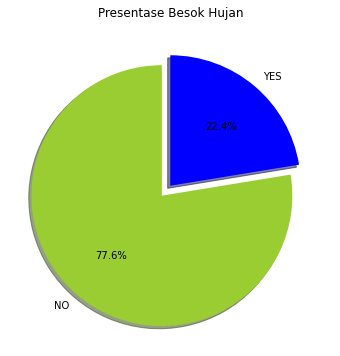

In [27]:
label = df_clean['Besok Hujan'].values 
explode = [0.1,0] 
y = df_clean['Besok Hujan'].value_counts()
label = ['NO','YES']
plt.figure(figsize=(6,6))
plt.pie(y, labels= label,
        colors=('yellowgreen','blue'),
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=90, 
        explode=explode
       )
plt.title('Presentase Besok Hujan')
plt.show()

### Measure of central tendency

In [28]:
# Nilai rata-rata dari atribut numerikal
mean = df_clean[num_cols].mean()
mean

Suhu Minimum                12.185565
Suhu Maximum                23.225365
Curah Hujan                  2.326738
Penguapan                    5.183213
Jam Cerah                    8.042236
Kecepatan Angin 24 jam      39.920123
Kecepatan Angin 9 Pagi      13.992489
Kecepatan Angin 3 Sore      18.644279
Kelembaban 9 Pagi           68.858235
Kelembaban 3 Sore           51.495742
Tekanan Udara 9 Pagi      1017.648460
Tekanan Udara 3 Sore      1015.252481
Awan 9 Pagi                  4.649568
Awan 3 Sore                  4.702658
Suhu Celcius 9 Pagi         16.985681
Suhu Celcius 3 Sore         21.675977
Tahun                     2012.758926
dtype: float64

In [29]:
# Nilai median dari atribut numerikal
median = df_clean[num_cols].median()
median

Suhu Minimum                12.0
Suhu Maximum                22.6
Curah Hujan                  0.0
Penguapan                    4.8
Jam Cerah                    8.5
Kecepatan Angin 24 jam      39.0
Kecepatan Angin 9 Pagi      13.0
Kecepatan Angin 3 Sore      19.0
Kelembaban 9 Pagi           70.0
Kelembaban 3 Sore           52.0
Tekanan Udara 9 Pagi      1017.6
Tekanan Udara 3 Sore      1015.2
Awan 9 Pagi                  5.0
Awan 3 Sore                  5.0
Suhu Celcius 9 Pagi         16.7
Suhu Celcius 3 Sore         21.1
Tahun                     2013.0
dtype: float64

In [30]:
# Nilai modus dari semua atribut kecuali atribut target
mode = df_clean.mode()
mode 

,Lokasi,Suhu Minimum,Suhu Maximum,Curah Hujan,Penguapan,Jam Cerah,Arah Angin 24 jam,Kecepatan Angin 24 jam,Arah Angin 9 Pagi,Arah Angin 3 Sore,...,Tekanan Udara 3 Sore,Awan 9 Pagi,Awan 3 Sore,Suhu Celcius 9 Pagi,Suhu Celcius 3 Sore,Hari ini Hujan,Besok Hujan,Tahun,Bulan,Hari
0,Canberra,12.0,22.6,0.0,4.8,8.5,W,39.0,N,SE,...,1015.2,5.0,5.0,16.7,21.1,No,No,2016,May,Sunday


**Rangkuman Measure of Central Tendency**

In [31]:
df_centraltendency = pd.DataFrame(data={
    'Mean':mean,
    'Median':median
}).transpose()
 
df_centraltendency 

,Suhu Minimum,Suhu Maximum,Curah Hujan,Penguapan,Jam Cerah,Kecepatan Angin 24 jam,Kecepatan Angin 9 Pagi,Kecepatan Angin 3 Sore,Kelembaban 9 Pagi,Kelembaban 3 Sore,Tekanan Udara 9 Pagi,Tekanan Udara 3 Sore,Awan 9 Pagi,Awan 3 Sore,Suhu Celcius 9 Pagi,Suhu Celcius 3 Sore,Tahun
Mean,12.185565,23.225365,2.326738,5.183213,8.042236,39.920123,13.992489,18.644279,68.858235,51.495742,1017.64846,1015.252481,4.649568,4.702658,16.985681,21.675977,2012.758926
Median,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000


**ANALISIS PERHITUNGAN TENDENSI SENTRAL**

1. Hampir mayoritas atribut bertipe numerikal memiliki nilai mean, median, dan modus yang hampir sama (selisihnya cukup kecil). Hal ini bisa menandakan bahwa mayoritas distribusi data pada atribut numerik cenderung simetris. Namun, masih ada beberapa atribut numerik yang selisih antara mean dan median nya cukup besar (cenderung tidak simetris), seperti Curah Hujan, Penguapan, Kecepatan Angin 24 Jam, Kecepatan Angin 9 Pagi, dan Kelembaban 9 Pagi
2. Atribut Curah Hujan memiliki mean > median (kecenderungan right skew) dan juga nilai modus sebesar 0. Hal ini menandakan bahwa sampel data yang ada lebih banyak tidak ada curah hujannya.
3. Mayoritas Arah Angin 24 Jam pada sampel dataset mengarah ke barat (W)
4. Sampel dataset didonimasi oleh label kelas 'Hari ini Hujan' dan 'Hari besok Hujan' berlabel No

### Menghitung measure of spread (variability)

In [32]:
# Nilai Simple Varians (ddof=1)

df_clean[num_cols].var(ddof=1).sort_values()

Awan 3 Sore                 4.489116
Awan 9 Pagi                 5.264075
Tahun                       6.457981
Jam Cerah                   7.670892
Penguapan                  10.146782
Suhu Minimum               40.818501
Suhu Celcius 9 Pagi        41.889455
Tekanan Udara 3 Sore       44.646586
Tekanan Udara 9 Pagi       45.512123
Suhu Celcius 3 Sore        47.213976
Suhu Maximum               50.546653
Curah Hujan                71.004650
Kecepatan Angin 3 Sore     76.067840
Kecepatan Angin 9 Pagi     78.351074
Kecepatan Angin 24 jam    172.676204
Kelembaban 9 Pagi         358.439999
Kelembaban 3 Sore         421.572337
dtype: float64

In [33]:
#Sampel Standard Deviation

df_clean[num_cols].std(ddof=1).sort_values()

Awan 3 Sore                2.118753
Awan 9 Pagi                2.294357
Tahun                      2.541256
Jam Cerah                  2.769638
Penguapan                  3.185401
Suhu Minimum               6.388936
Suhu Celcius 9 Pagi        6.472206
Tekanan Udara 3 Sore       6.681810
Tekanan Udara 9 Pagi       6.746267
Suhu Celcius 3 Sore        6.871243
Suhu Maximum               7.109617
Curah Hujan                8.426426
Kecepatan Angin 3 Sore     8.721688
Kecepatan Angin 9 Pagi     8.851614
Kecepatan Angin 24 jam    13.140632
Kelembaban 9 Pagi         18.932512
Kelembaban 3 Sore         20.532227
dtype: float64

In [34]:
#Nilai skewness

df_clean[num_cols].skew().sort_values(ascending=False)

Curah Hujan               9.934023
Penguapan                 5.140075
Kecepatan Angin 24 jam    0.918436
Kecepatan Angin 9 Pagi    0.782261
Kecepatan Angin 3 Sore    0.635020
Suhu Celcius 3 Sore       0.247242
Suhu Maximum              0.225763
Suhu Celcius 9 Pagi       0.092524
Kelembaban 3 Sore         0.033042
Suhu Minimum              0.024345
Tahun                    -0.042629
Tekanan Udara 3 Sore     -0.046081
Tekanan Udara 9 Pagi     -0.098977
Kelembaban 9 Pagi        -0.488110
Awan 9 Pagi              -0.551152
Awan 3 Sore              -0.562072
Jam Cerah                -1.110020
dtype: float64

In [35]:
#Percentiles

# menghitung kuartile 1,2, dan 3
Q1,Q2, Q3 = df_clean[num_cols].quantile(0.25), df_clean[num_cols].quantile(0.5),df_clean[num_cols].quantile(0.75)

# menghitung IQR (selisih dari Q3 dengan Q1)
IQR = Q3-Q1 

In [36]:
#Ranges

max_ = df_clean[num_cols].max()
min_ = df_clean[num_cols].min() 
ranges =  max_ - min_

**Rangkuman Measure of Variability**

In [37]:
df_clean_variability = pd.DataFrame(data={
    'Q1':Q1,
    'Q2':Q2,
    'Q3':Q3,
    'IQR':IQR,
    'Maximum':max_,
    'Minimum':min_,
    'Ranges':ranges
}).transpose()

In [38]:
df_clean_variability

,Suhu Minimum,Suhu Maximum,Curah Hujan,Penguapan,Jam Cerah,Kecepatan Angin 24 jam,Kecepatan Angin 9 Pagi,Kecepatan Angin 3 Sore,Kelembaban 9 Pagi,Kelembaban 3 Sore,Tekanan Udara 9 Pagi,Tekanan Udara 3 Sore,Awan 9 Pagi,Awan 3 Sore,Suhu Celcius 9 Pagi,Suhu Celcius 3 Sore,Tahun
Q1,7.6,17.9,0.0,4.0,8.2,31.0,7.0,13.0,57.0,37.0,1013.5,1011.0,3.0,4.0,12.3,16.7,2011.0
Q2,12.0,22.6,0.0,4.8,8.5,39.0,13.0,19.0,70.0,52.0,1017.6,1015.2,5.0,5.0,16.7,21.1,2013.0
Q3,16.8,28.2,0.6,5.4,8.7,46.0,19.0,24.0,83.0,65.0,1021.8,1019.4,6.0,6.0,21.5,26.3,2015.0
IQR,9.2,10.3,0.6,1.4,0.5,15.0,12.0,11.0,26.0,28.0,8.3,8.4,3.0,2.0,9.2,9.6,4.0
Maximum,33.9,48.1,371.0,145.0,14.5,135.0,130.0,87.0,100.0,100.0,1041.0,1039.6,9.0,9.0,40.2,46.7,2017.0
Minimum,-8.5,-4.8,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,980.5,977.1,0.0,0.0,-7.2,-5.4,2007.0
Ranges,42.4,52.9,371.0,145.0,14.5,129.0,130.0,87.0,100.0,100.0,60.5,62.5,9.0,9.0,47.4,52.1,10.0


ANALISIS PENGUKURAN SEBARAN DATA (Measure of Spread)

1. Sebaran data dapat dijelaskan dengan menggunakan variance atau standar deviasi. Namun standar deviasi lebih cocok daripada variance karena memiliki satuan yang sama dengan data points.
2. Atribut Awan 3 Sore memiliki sebaran data yang tidak bervariasi, sedangkan atribut Kelembaban 3 Sore memiliki sebaran data yang paling bervariasi.
3. Sebanyak 75% bagian dari data yang ada, nilainya ada di bawah 28,2; dan 25% sisanya berada di atas 28,2 dengan batas maksimum sebesar 48,1
4. Interpretasi perhitungan percentile pada atribut Curah Hujan **adalah**:

Sebanyak 75% bagian dari data yang ada, nilainya ada di bawah 28,2; dan 25% sisanya berada di atas 28,2 dengan batas maksimum sebesar 48,1
5. Interpretasi perhitungan percentile pada atribut Curah Hujan **adalah**:

Sebanyak 75% bagian dari data yang ada, nilainya ada di bawah 0,6; dan 25% sisanya berada di atas 0,6 dengan batas maksimum sebesar 371. Hal ini juga menjelaskan bahwa modus untuk atribut ini bernilai 0.






**korelasi atribut feature dengan atribut target**

In [39]:
# encoding categorical columns dengan ordinal encoder

In [40]:
df_clean[num_cols]

,Suhu Minimum,Suhu Maximum,Curah Hujan,Penguapan,Jam Cerah,Kecepatan Angin 24 jam,Kecepatan Angin 9 Pagi,Kecepatan Angin 3 Sore,Kelembaban 9 Pagi,Kelembaban 3 Sore,Tekanan Udara 9 Pagi,Tekanan Udara 3 Sore,Awan 9 Pagi,Awan 3 Sore,Suhu Celcius 9 Pagi,Suhu Celcius 3 Sore,Tahun
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,2008
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,2008
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,2008
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,2008
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,4.8,8.5,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,2017
145455,2.8,23.4,0.0,4.8,8.5,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,2017
145456,3.6,25.3,0.0,4.8,8.5,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,2017
145457,5.4,26.9,0.0,4.8,8.5,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,2017


In [41]:
categorical_cols = list(cat_cols)
categorical_cols.remove('Besok Hujan')

#encode target ke numerical
x_numerical = df_clean['Besok Hujan'].replace({'Yes':1,'No':0})


In [42]:
x_cate = df_clean[categorical_cols]
y_cate = x_numerical

In [43]:
# Encoding categorical attributes
ordinal_encoder = OrdinalEncoder()

# fit into data
ordinal_encoder = ordinal_encoder.fit(x_cate)

# transform into data
x_cate_encoded = ordinal_encoder.transform(x_cate)

In [44]:
# instansiasi objek MutualInformation
mutual_info_fs = SelectKBest(score_func=mutual_info_classif, k='all')

# fit into encoded data
mutual_info_fs = mutual_info_fs.fit(x_cate_encoded,y_cate)

In [45]:
df_mutual_info_fs = pd.Series(data=mutual_info_fs.scores_, index=categorical_cols).sort_values(ascending=False)


Text(0.5, 1.0, 'Mutual Information setiap atribut kategorikal terhadap Target')

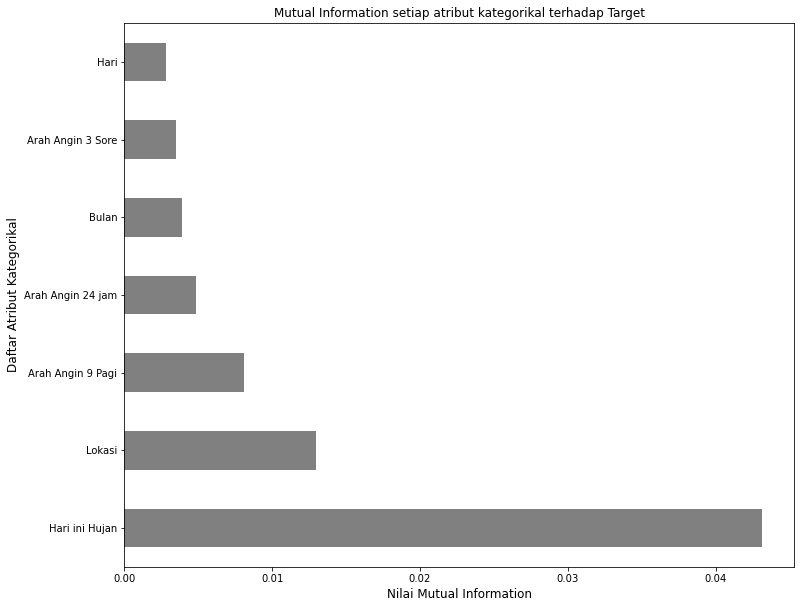

In [46]:
# Plotting score setiap atribut kategorikal
plt.figure(figsize=(12,10))
df_mutual_info_fs.plot(kind='barh', color='grey')
plt.ylabel('Daftar Atribut Kategorikal', fontsize=12)
plt.xlabel('Nilai Mutual Information', fontsize=12)
plt.title('Mutual Information setiap atribut kategorikal terhadap Target',fontsize=12)

Analisis

Hasil tersebut dapat menjadi dasar dalam langkah selanjutnya khususnya pada langkah mencari F-Score. interpretasi hasil dari bar chart diatas :
1.  Semakin besar nilai Mutual Information semakin besar hubungan atau korelasi atribut tersebut dengan kelas target
2.   Semakin kecil nilai Mutual Information semakin kecil hubungan atau korelasi atribut tersebut dengan kelas target
3.   Atribut Hari,Bulan menjadi dua atribut dengan kepentingan atribut yang paling kecil dengan kelas target
4.   Atribut yang dipertahankan Hari ini Hujan, Kota, Arah Angin 9 Pagi


In [47]:
# mempertahankan 3 fitur kategorikal
cat_cols_retain = list(df_mutual_info_fs[:3].index.values)

**Pengaruh atribut numerikal ke target kategorikal (ANOVA F-Score)**

In [48]:
# Menyiapkan data (atribut dan target) hanya untuk tipe numerikal
X_nume = df_clean.loc[:,num_cols] 
y_nume= df_clean['Besok Hujan'].replace({'Yes':1,'No':0})

In [49]:
# instansiasi objek untuk anova
anova_fs = SelectKBest(score_func=f_classif,k='all')

# fitting ke data
anova_fs = anova_fs.fit(X_nume,y_nume)

In [50]:
df_anova_fs = pd.Series(data=anova_fs.scores_, index=num_cols).sort_values(ascending=False)


Text(0.5, 1.0, 'F-Score setiap atribut numerik terhadap Target')

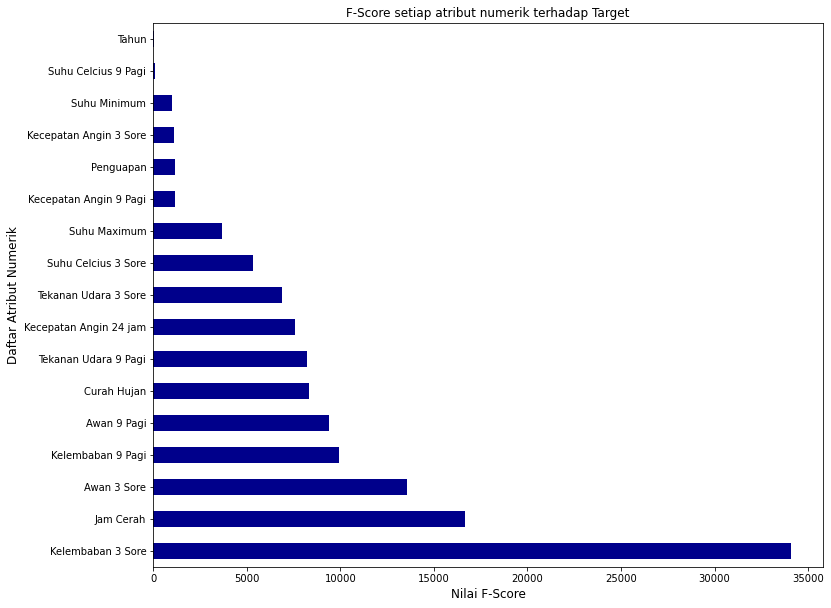

In [51]:
# Plotting score setiap atribut
plt.figure(figsize=(12,10))
df_anova_fs.plot(kind='barh', color='darkblue')
plt.ylabel('Daftar Atribut Numerik', fontsize=12)
plt.xlabel('Nilai F-Score', fontsize=12)
plt.title('F-Score setiap atribut numerik terhadap Target',fontsize=12)

**Analisis**

Hasil ini bisa menjadi dasar dalam pengambilan keputusan pada langkah Data Preprocessing.
Interpretasi hasil gambar di atas:


1.   Semakin besar nilai F-score semakin besar hubungan atau korelasi atribut tersebut dengan kelas target
2.   Atribut Tahun, Suhu Celcius 9 Pagi menjadi dua atribut dengan kepentingan atribut terkecil dengan kelas target
3.   Atribut Kelembaban 3 Sore paling menentukan apakah kejadian pada "besok Hujan"




In [52]:
# pertahankan 3 atribut teratas (numerik)
num_cols_retain = list(df_anova_fs[:3].index.values)

## Data Preprocessing

Variabel global ini nantinya digunakan untuk menampung hal-hal yang berkaitan dengan proses preprocessing, seperti:

1. Feature selection
2. Machine learning models
3. etc

In [53]:
df_clean.head()

,Lokasi,Suhu Minimum,Suhu Maximum,Curah Hujan,Penguapan,Jam Cerah,Arah Angin 24 jam,Kecepatan Angin 24 jam,Arah Angin 9 Pagi,Arah Angin 3 Sore,...,Tekanan Udara 3 Sore,Awan 9 Pagi,Awan 3 Sore,Suhu Celcius 9 Pagi,Suhu Celcius 3 Sore,Hari ini Hujan,Besok Hujan,Tahun,Bulan,Hari
0,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,WNW,...,1007.1,8.0,5.0,16.9,21.8,No,No,2008,December,Monday
1,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,WSW,...,1007.8,5.0,5.0,17.2,24.3,No,No,2008,December,Tuesday
2,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,WSW,...,1008.7,5.0,2.0,21.0,23.2,No,No,2008,December,Wednesday
3,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,E,...,1012.8,5.0,5.0,18.1,26.5,No,No,2008,December,Thursday
4,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,December,Friday


In [54]:
df_prepro = df_clean[['Lokasi', 'Suhu Minimum', 'Suhu Maximum', 'Curah Hujan', 'Penguapan',
       'Jam Cerah', 'Arah Angin 24 jam', 'Kecepatan Angin 24 jam',
       'Arah Angin 9 Pagi', 'Arah Angin 3 Sore', 'Kecepatan Angin 9 Pagi',
       'Kecepatan Angin 3 Sore', 'Kelembaban 9 Pagi', 'Kelembaban 3 Sore',
       'Tekanan Udara 9 Pagi', 'Tekanan Udara 3 Sore', 'Awan 9 Pagi',
       'Awan 3 Sore', 'Suhu Celcius 9 Pagi', 'Suhu Celcius 3 Sore',
       'Hari ini Hujan', 'Tahun', 'Bulan', 'Hari', 'Besok Hujan']] 

In [55]:
df_prepro.head()

,Lokasi,Suhu Minimum,Suhu Maximum,Curah Hujan,Penguapan,Jam Cerah,Arah Angin 24 jam,Kecepatan Angin 24 jam,Arah Angin 9 Pagi,Arah Angin 3 Sore,...,Tekanan Udara 3 Sore,Awan 9 Pagi,Awan 3 Sore,Suhu Celcius 9 Pagi,Suhu Celcius 3 Sore,Hari ini Hujan,Tahun,Bulan,Hari,Besok Hujan
0,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,WNW,...,1007.1,8.0,5.0,16.9,21.8,No,2008,December,Monday,No
1,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,WSW,...,1007.8,5.0,5.0,17.2,24.3,No,2008,December,Tuesday,No
2,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,WSW,...,1008.7,5.0,2.0,21.0,23.2,No,2008,December,Wednesday,No
3,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,E,...,1012.8,5.0,5.0,18.1,26.5,No,2008,December,Thursday,No
4,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,2008,December,Friday,No


Drop data target

In [56]:
df_prepro.drop(df_prepro[df_prepro['Besok Hujan'].isnull()].index.values, inplace=True)

In [57]:
df_prepro.reset_index(drop=True, inplace=True)

Train Test Split

In [58]:
# split atribut dan target
X, y = df_prepro.drop('Besok Hujan', axis = 1), df_prepro['Besok Hujan']

Ambil data atribut berasarkan Anova dan Mutual Information

In [59]:
retain = cat_cols_retain + num_cols_retain
X = X[retain] 

In [60]:
X.head()  

,Hari ini Hujan,Lokasi,Arah Angin 9 Pagi,Kelembaban 3 Sore,Jam Cerah,Awan 3 Sore
0,No,Albury,W,22.0,8.5,5.0
1,No,Albury,NNW,25.0,8.5,5.0
2,No,Albury,W,30.0,8.5,2.0
3,No,Albury,SE,16.0,8.5,5.0
4,No,Albury,ENE,33.0,8.5,8.0


In [61]:
X.columns

Index(['Hari ini Hujan', 'Lokasi', 'Arah Angin 9 Pagi', 'Kelembaban 3 Sore',
       'Jam Cerah', 'Awan 3 Sore'],
      dtype='object')

In [62]:
X.reset_index(drop=True, inplace=True)
X.head(20)

,Hari ini Hujan,Lokasi,Arah Angin 9 Pagi,Kelembaban 3 Sore,Jam Cerah,Awan 3 Sore
0,No,Albury,W,22.0,8.5,5.0
1,No,Albury,NNW,25.0,8.5,5.0
2,No,Albury,W,30.0,8.5,2.0
3,No,Albury,SE,16.0,8.5,5.0
4,No,Albury,ENE,33.0,8.5,8.0
5,No,Albury,W,23.0,8.5,5.0
6,No,Albury,SW,19.0,8.5,5.0
7,No,Albury,SSE,19.0,8.5,5.0
8,No,Albury,SE,9.0,8.5,5.0
9,Yes,Albury,S,27.0,8.5,5.0


**Encoding pada X**

In [63]:
# Mengubah tipe data kategorikal dari object ke category
X['Hari ini Hujan'] = X['Hari ini Hujan'].astype('category')
X['Lokasi'] = X['Lokasi'].astype('category')
X['Arah Angin 9 Pagi'] = X['Arah Angin 9 Pagi'].astype('category')
#Encoding kolom kategorikal
X['Hari ini Hujan'] = X['Hari ini Hujan'].cat.codes
X['Lokasi'] = X['Lokasi'].cat.codes
X['Arah Angin 9 Pagi'] = X['Arah Angin 9 Pagi'].cat.codes

In [64]:
X.head()

,Hari ini Hujan,Lokasi,Arah Angin 9 Pagi,Kelembaban 3 Sore,Jam Cerah,Awan 3 Sore
0,0,2,13,22.0,8.5,5.0
1,0,2,6,25.0,8.5,5.0
2,0,2,13,30.0,8.5,2.0
3,0,2,9,16.0,8.5,5.0
4,0,2,1,33.0,8.5,8.0


In [65]:
 #splitting data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)


In [66]:
X['Kelembaban 3 Sore'].max()

100.0

In [67]:


lokasi = ['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru']

In [68]:
df_prepro.loc[0,'Lokasi']


'Albury'

In [69]:
lok = []
hasil = []

for i in range (0,len(X['Lokasi'])) :
    if df_prepro.loc[i,'Lokasi'] in lok:
        pass
    else:
        hasil.append(X.loc[i,'Lokasi'])
        lok.append(df_prepro.loc[i,'Lokasi'])
        
    
    

In [70]:
lokasi = {}
for key in lok:
    for value in hasil:
        lokasi[key] = value
        hasil.remove(value)
        break

In [71]:
arah = []
hsl = []

for i in range (0,len(X['Arah Angin 9 Pagi'])) :
    if df_prepro.loc[i,'Arah Angin 9 Pagi'] in arah:
        pass
    else:
        hsl.append(X.loc[i,'Arah Angin 9 Pagi'])
        arah.append(df_prepro.loc[i,'Arah Angin 9 Pagi'])

In [72]:
arh = {}
for key in arah:
    for value in hsl:
        arh[key] = value
        hsl.remove(value)
        break

In [73]:
arh

{'W': 13,
 'NNW': 6,
 'SE': 9,
 'ENE': 1,
 'SW': 12,
 'SSE': 10,
 'S': 8,
 'NE': 4,
 'N': 3,
 'SSW': 11,
 'WSW': 15,
 'ESE': 2,
 'E': 0,
 'NW': 7,
 'WNW': 14,
 'NNE': 5}

In [74]:
lokasi['Albury']

2

In [75]:
X['Jam Cerah'].unique()

array([ 8.5, 12.3, 13. , 13.3, 10.6, 12.2,  8.4,  0. , 12.6, 13.2, 12.7,
       12.1, 10.3, 13.1, 12.9, 11.3,  6.9, 10.9,  3.7,  5.9, 10.5, 12.4,
       13.4, 13.6,  7.4, 10. ,  2.3,  6.6,  0.3, 10.7, 11.6, 10.2,  9. ,
       12. ,  3. ,  7.9, 11.5, 11.2,  4.8,  5.8,  6. , 11.1, 11.8, 11.4,
       10.8,  7.8, 11. ,  5.5,  4.7,  4.2,  4.4,  6.2,  9.8,  9.9,  4.3,
        8. ,  9.6, 10.4,  9.3,  8.7,  7.6,  7.5, 10.1,  6.3,  2.8,  0.7,
        9.4,  9.7,  0.6,  5.1,  8.3,  4.1,  3.9,  6.8,  8.6,  2.7,  8.2,
        3.1,  1.8,  0.1,  0.8,  3.4,  7.1,  5. ,  5.7,  6.1,  7. ,  2.9,
        2.5,  4.6,  8.9,  9.1,  1.7,  8.1,  9.5,  1.2,  1.4,  8.8,  2.2,
        3.5,  9.2,  1.9, 11.7, 11.9,  7.7,  0.9, 12.5,  2.1, 12.8, 13.7,
        0.2,  4. ,  2.4,  5.2,  0.5,  6.4,  4.5,  1.1,  2. ,  0.4,  1.5,
        3.3,  6.5,  2.6,  3.8,  3.6,  3.2,  6.7,  5.4,  7.2,  4.9,  1. ,
        1.6,  5.3,  7.3,  5.6,  1.3, 13.8, 13.5, 14. , 13.9, 14.1, 14.5,
       14.3, 14.2])

In [76]:
x_train.head(
)

,Hari ini Hujan,Lokasi,Arah Angin 9 Pagi,Kelembaban 3 Sore,Jam Cerah,Awan 3 Sore
45138,1,9,3,59.0,8.5,5.0
24336,0,30,11,91.0,8.5,5.0
114763,0,32,1,26.0,11.5,0.0
91279,1,39,7,69.0,4.3,7.0
29855,0,37,7,20.0,11.1,2.0


**Undersampling Data Latih**

In [77]:
# menyatukan atribut dan target pada data latih
df_u = pd.concat([pd.DataFrame(data=x_train.reset_index(drop=True)),y_train.reset_index(drop=True)],axis=1)

In [78]:
# melihat banyak setiap nilai pada label kelas
df_u['Besok Hujan'].value_counts()

No     77256
Yes    22279
Name: Besok Hujan, dtype: int64

In [79]:
df_u['Besok Hujan'].replace({'No':0,'Yes':1},inplace=True) 

In [80]:
df_u

,Hari ini Hujan,Lokasi,Arah Angin 9 Pagi,Kelembaban 3 Sore,Jam Cerah,Awan 3 Sore,Besok Hujan
0,1,9,3,59.0,8.5,5.0,1
1,0,30,11,91.0,8.5,5.0,1
2,0,32,1,26.0,11.5,0.0,0
3,1,39,7,69.0,4.3,7.0,0
4,0,37,7,20.0,11.1,2.0,0
...,...,...,...,...,...,...,...
99530,0,36,3,8.0,8.5,5.0,0
99531,0,43,1,45.0,8.5,5.0,0
99532,0,26,11,61.0,8.5,5.0,0
99533,1,26,8,60.0,8.5,5.0,0


In [81]:
# jumlah sampel untuk diundersampling
jml_sampel = 1000

# under-sampling kelas 'No' agar jumlahnya sama dengan kelas 'Yes' sebesar n_sampel
df_no = df_u[df_u['Besok Hujan']==0].sample(frac=1, random_state=42)[:jml_sampel]
df_yes = df_u[df_u['Besok Hujan']==1].sample(frac=1, random_state=42)[:jml_sampel]

# concat data berlabel 'yes' dan 'no' hasil balanced sampling
normal_distributed_df = pd.concat([df_yes,df_no])

# shuffle row pada data yang sudah digabung agar acak
weatherAus_df_normal_distributed = normal_distributed_df.sample(frac=1, random_state=42)
  
x_train = weatherAus_df_normal_distributed.drop('Besok Hujan',axis=1)
y_train = weatherAus_df_normal_distributed['Besok Hujan']  

In [82]:
x_train

,Hari ini Hujan,Lokasi,Arah Angin 9 Pagi,Kelembaban 3 Sore,Jam Cerah,Awan 3 Sore
83330,0,3,12,23.0,10.5,3.0
59220,1,42,1,80.0,1.0,7.0
2223,0,6,3,11.0,8.5,3.0
99365,1,12,3,88.0,8.5,5.0
7395,0,25,3,14.0,8.5,5.0
...,...,...,...,...,...,...
96103,1,19,13,67.0,0.8,7.0
95787,0,45,3,58.0,8.5,5.0
75911,0,25,4,40.0,8.5,5.0
1504,0,45,7,14.0,8.5,4.0


In [83]:
y_train

83330    0
59220    1
2223     0
99365    1
7395     0
        ..
96103    0
95787    0
75911    1
1504     0
69814    0
Name: Besok Hujan, Length: 2000, dtype: int64

In [84]:
# Standarisasi data
ss = StandardScaler()

# fit into training data
ss.fit(x_train)

x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [85]:
x_train

array([[-0.65699256, -1.4953683 ,  1.0846578 , -1.63510085,  1.00014277,
        -1.00731173],
       [ 1.52208725,  1.27061447, -1.35626606,  1.02952872, -2.00162843,
         0.90545681],
       [-0.65699256, -1.28260039, -0.91246172, -2.1960755 ,  0.36819094,
        -1.00731173],
       ...,
       [-0.65699256,  0.06492967, -0.69055955, -0.84038677,  0.36819094,
        -0.05092746],
       [-0.65699256,  1.48338237, -0.02485304, -2.05583184,  0.36819094,
        -0.5291196 ],
       [ 1.52208725, -1.63721357, -0.02485304,  0.18806675, -0.70612718,
        -0.05092746]])

In [86]:
x_train

array([[-0.65699256, -1.4953683 ,  1.0846578 , -1.63510085,  1.00014277,
        -1.00731173],
       [ 1.52208725,  1.27061447, -1.35626606,  1.02952872, -2.00162843,
         0.90545681],
       [-0.65699256, -1.28260039, -0.91246172, -2.1960755 ,  0.36819094,
        -1.00731173],
       ...,
       [-0.65699256,  0.06492967, -0.69055955, -0.84038677,  0.36819094,
        -0.05092746],
       [-0.65699256,  1.48338237, -0.02485304, -2.05583184,  0.36819094,
        -0.5291196 ],
       [ 1.52208725, -1.63721357, -0.02485304,  0.18806675, -0.70612718,
        -0.05092746]])

## Pendefinisian Model
Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model.
Akan lebih bagus jika didahului dengan penjelasan mengapa memilih
arsitektur atau jenis model tertentu.


*   pemilihan model logistik regression dikarenakan untuk memprediksi probabilitas kejadian suatu peristiwa dengan mencocokan data pada fungsi logit
*   pemilihan model svm dikarenakan akurasi yang tinggi serta bekerja dengan baik dengan ruang dimensi tinggi. SVM pengklasifikasi pada dasarnya menggunakan subset dari poin pelatihan sehingga hasilnya menggunakan memori yang sangat sedikit.






In [87]:
# inisialisasi model
logreg_balanced = LogisticRegression()

# inisialisasi model
svm_balanced = SVC(kernel = 'linear')

## Pelatihan Model
Cell pada bagian ini hanya berisi code untuk melatih model dan output yang
dihasilkan.

In [88]:
#Logistic Regression

# fit model into training data
logreg_balanced.fit(x_train,y_train)
# get y prediction
y_pred_train_logreg_balanced = logreg_balanced.predict(x_train)
y_pred_test_logreg_balanced = logreg_balanced.predict(x_test) 

In [89]:
# SVM

# fit model into training data
svm_balanced.fit(x_train,y_train)
# get y prediction
y_pred_train_svm_balanced = svm_balanced.predict(x_train) 
y_pred_test_svm_balanced = svm_balanced.predict(x_test)

## Evaluasi Model
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan
bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus
dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan
model

In [90]:
logreg_balanced.score(x_train, y_train)

0.7565

In [91]:
svm_balanced.score(x_train, y_train)

0.754

Di sini kami mendapatkan score pada model logistic regression adalah 0.7809916109911087 dan pada model svm adalah 0.8206638115631691

## Model Inference
Bagian ini diisi dengan model inference, di mana model yang sudah kita
latih akan dicoba pada data selain data yang sudah tersedia. Data yang
dimaksud bisa berupa data buatan oleh student, ataupun data yang ada
pada internet.

Prediksi Besok Hujan

Input Data :
1.   Hari ini Hujan_No = 0.0
2.   Hari ini Hujan_Yes = 1.0
3.   Arah Angin 3 Sore_E = 0.0
4.   Arah Angin 3 Sore_ENE = 0.0
5.   Arah Angin 3 Sore_ESE = 0.0
6.   Arah Angin 3 Sore_N = 0.0
7.   Arah Angin 3 Sore_NE = 0.0
8.   Arah Angin 3 Sore_NNE = 1.0
9.   Arah Angin 3 Sore_NNW  = 0.0
10.  Arah Angin 3 Sore_NW = 0.0
11.  Arah Angin 3 Sore_S = 0.0
12.  Arah Angin 3 Sore_SE = 0.0
13.  Arah Angin 3 Sore_SSE = 0.0
14.  Arah Angin 3 Sore_SSW = 0.0
15.  Arah Angin 3 Sore_SW = 0.0
16.  Arah Angin 3 Sore_W = 0.0
17.  Arah Angin 3 Sore_WNW = 0.0
18.  Arah Angin 3 Sore_WSW = 0.0
19.  Bulan_April = 0.0
20.  Bulan_August = 0.0
21.  Bulan_December = 0.0
22.  Bulan_February = 0.0
23.  Bulan_January = 0.0
24.  Bulan_July = 0.0
25.  Bulan_June = 0.0
26.  Bulan_March = 0.0
27.  Bulan_May = 0.0
28.  Bulan_November = 0.0
29.  Bulan_October = 0.0
30.  Bulan_September = 1.0

Dari input data tersebut, memiliki arti bahwa input datanya adalah
1. Hari ini Hujan = Yes
2. Arah Angin 3 Sore = NNE
3. Bulan = September


In [92]:
print('Hasil Prediksi dengan Logistic Regression : ', logreg_balanced.predict([[0.0,0.0,40.0,6.0,8.5,1.0]]))

Hasil Prediksi dengan Logistic Regression :  [0]


In [93]:
print('Hasil Prediksi dengan SVM : ', svm_balanced.predict([[0.0,0.0,40.0,6.0,8.5,1.0]]))

Hasil Prediksi dengan SVM :  [0]


Dari program diatas maka diperoleh Prediksi bahwa besok tidak hujan.



## Pengambilan Kesimpulan
Pada bab terakhir ini, harus berisi kesimpulan yang mencerminkan hasil
yang didapat dengan dibandingkan dengan objective yang sudah ditulis di
bagian pengenalan. 

model prediksi Besok Hujan yang dibentuk dengan menggunakan beberapa faktor yang mempengaruhi yaitu hari ini hujan, arah angin 3 sore, dan bulan memiliki score sebesar 0.780991 untuk model logistic regression dan score sebesar 0.820663 untuk model SVM. Karena 

Karena score model SVM lebih besar dari Logistic Regression maka model akhir yang kami pilih adalah SVM . Selan itu, Pemilihan model SVM dikarenakan akurasi yang tinggi serta bekerja dengan baik dengan ruang dimensi tinggi. SVM pengklasifikasi pada dasarnya menggunakan subset dari poin pelatihan sehingga hasilnya menggunakan memori yang sangat sedikit.

In [94]:
# Menyimpan model logistic regression di pickle
pickle.dump(logreg_balanced, open('./model_classifier_logreg.pkl','wb'))

In [95]:
# Menyimpan model SVM di pickle
pickle.dump(svm_balanced, open('./model_classifier_svm.pkl','wb'))